In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
def load_data(train_size=0.8):
    df = pd.read_csv('spam.csv', encoding='latin-1')

    idx = np.arange(df.shape[0])
    print(idx)
    np.random.shuffle(idx)

    train_set_size = int(df.shape[0] * train_size)

    train_set = df.loc[idx[:train_set_size]]
    test_set = df.loc[idx[train_set_size:]]

    return train_set, test_set

In [4]:
train_set, test_set = load_data()

[   0    1    2 ... 5569 5570 5571]


In [5]:
def clean_data(message):
    return re.sub('[\W_]+', ' ', message).lower()

In [6]:
def prep_for_model(train_set, test_set):
    regex = r'\b\w+\b'

    train_set_x = train_set['v2'].apply(lambda x : re.findall(regex,clean_data(x))).to_numpy()
    train_set_y = train_set['v1'].to_numpy()
    test_set_x = test_set['v2'].apply(lambda x : re.findall(regex,clean_data(x))).to_numpy()
    test_set_y = test_set['v1'].to_numpy()

    return train_set_x, train_set_y, test_set_x, test_set_y

train_set_x, train_set_y, test_set_x, test_set_y = prep_for_model(train_set, test_set)

In [8]:
def categories_words(x_train, y_train):

    all_words_list = []
    ham_words_list = []
    spam_words_list = []

    for i in range(len(x_train)):
        for j in range(len(x_train[i])):
            all_words_list.append(x_train[i][j])
            if y_train[i]=='ham':
                ham_words_list.append(x_train[i][j])
            else:
                spam_words_list.append(x_train[i][j])
    all_words_list = np.array(all_words_list)
    ham_words_list = np.array(ham_words_list)
    spam_words_list = np.array(spam_words_list)


    return all_words_list, ham_words_list, spam_words_list

In [5]:
class NaiveBayes(object):
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.train_set_x = None
        self.train_set_y = None
        self.ham_words_dict = {}
        self.spam_words_dict = {}
        self.prior_ham_prob = None
        self.prior_spam_prob = None


    def fit(self, train_set_x, train_set_y):
        all_words_list, ham_words_list, spam_words_list = categories_words(train_set_x, train_set_y)
        ham_words_flat_len = ham_words_list.flatten().shape[0]
        spam_words_flat_len = spam_words_list.flatten().shape[0]
        un_words = np.unique(all_words_list.flatten())
        for word in un_words:
            k1=np.count_nonzero(ham_words_list==word)
            k2=np.count_nonzero(spam_words_list==word)
            self.ham_words_dict[word]= k1+self.alpha/(ham_words_flat_len+un_words.shape[0])
            self.spam_words_dict[word]= k2+self.alpha/(spam_words_flat_len+un_words.shape[0])
        self.prior_ham_prob = np.count_nonzero(train_set_y=='ham')/train_set_y.shape[0]
        self.prior_spam_prob = np.count_nonzero(train_set_y=='spam')/train_set_y.shape[0]


    def predict(self, test_set_x):
        prediction = []
        for message in test_set_x:
            ham_scr = 1
            spam_scr = 1
            for word in message:
                if word in self.ham_words_dict:
                    ham_scr*=self.ham_words_dict[word]
                    spam_scr*=self.spam_words_dict[word]
            ham_scr*=self.prior_ham_prob
            spam_scr*=self.prior_spam_prob
            if ham_scr>spam_scr:
                prediction.append('ham')
            else:
                prediction.append('spam')
        return prediction

In [19]:
train_sizes = []
accuracies = []
for train_size in np.arange(0.01,0.99,0.01):
    train_sizes.append(train_size)
    model = NaiveBayes()
    train_set, test_set = load_data(train_size)
    train_set_x, train_set_y, test_set_x, test_set_y = prep_for_model(train_set, test_set)
    model.fit(train_set_x, train_set_y)
    y_predictions = model.predict(test_set_x)
    accuracy = (y_predictions == test_set_y).mean()
    accuracies.append(accuracy)

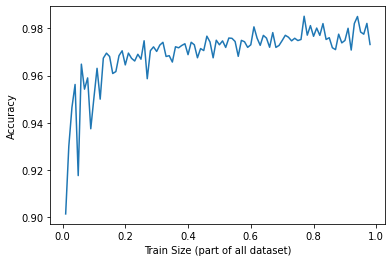

In [20]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, accuracies)
plt.xlabel("Train Size (part of all dataset)")
plt.ylabel("Accuracy")
plt.show()

In [21]:
accuracies

[0.9013956860612652,
 0.9300494414942319,
 0.9465309898242368,
 0.9562616822429907,
 0.9176426142803173,
 0.9648720885834288,
 0.9542647626399073,
 0.9590403744880047,
 0.93748767501479,
 0.9505483549351944,
 0.9631048387096774,
 0.9500407830342578,
 0.9674092409240924,
 0.9695325542570952,
 0.9681232847793962,
 0.9609057893612476,
 0.9617297297297297,
 0.9684901531728666,
 0.9705361098803722,
 0.9645580978017048,
 0.9695592912312585,
 0.96733379342075,
 0.9662083430435796,
 0.9690672963400236,
 0.9669777458722182,
 0.9747817652764307,
 0.9587020648967551,
 0.9705882352941176,
 0.9722011624968411,
 0.9702640348628557,
 0.9729518855656697,
 0.9741356558458696,
 0.968130690948045,
 0.9684611201740077,
 0.9657647708448371,
 0.9722455845248108,
 0.9718029051552264,
 0.9727930535455861,
 0.9735216240070609,
 0.9688995215311005,
 0.9741484184914841,
 0.9730816831683168,
 0.9675794774944917,
 0.9714834988785646,
 0.9706362153344209,
 0.9767364572947823,
 0.974272173324306,
 0.9675638371290545